In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import eli5
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.inspection import permutation_importance
from eli5.sklearn import PermutationImportance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

In [2]:
stroke = pd.read_csv('stroke.csv')

In [3]:
stroke.dropna(axis = 0, inplace = True)

In [4]:
# gender의 other 성별 제거
mask = stroke['gender'].isin(['Other'])
stroke = stroke[~mask]

In [5]:
stroke['smoking_status'] = stroke['smoking_status'].str.replace(' ', '_')

In [6]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly_smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never_smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never_smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly_smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never_smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never_smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly_smoked,0


In [7]:
x_data = stroke.drop(['stroke', 'id', 'ever_married', 'work_type', 'Residence_type'], axis = 1)
y_data = stroke['stroke']

In [8]:
x_data

,gender,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,228.69,36.6,formerly_smoked
2,Male,80.0,0,1,105.92,32.5,never_smoked
3,Female,49.0,0,0,171.23,34.4,smokes
4,Female,79.0,1,0,174.12,24.0,never_smoked
5,Male,81.0,0,0,186.21,29.0,formerly_smoked
...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,103.08,18.6,Unknown
5106,Female,81.0,0,0,125.20,40.0,never_smoked
5107,Female,35.0,0,0,82.99,30.6,never_smoked
5108,Male,51.0,0,0,166.29,25.6,formerly_smoked


In [9]:
'''
stroke = pd.get_dummies(data = stroke, columns = ['work_type'], drop_first=False, prefix = 'w', prefix_sep= '_')
stroke = pd.get_dummies(data = stroke, columns = ['smoking_status'], drop_first=False, prefix = 's', prefix_sep = '_')
stroke = pd.get_dummies(data = stroke, columns = ['ever_married'], drop_first=False, prefix = 'm', prefix_sep = '_')
stroke = pd.get_dummies(data = stroke, columns = ['Residence_type'], drop_first=False, prefix = 'r', prefix_sep = '_')
stroke = pd.get_dummies(data = stroke, columns = ['gender'], drop_first=False)
'''
x_data = pd.get_dummies(x_data, columns=['gender', 'smoking_status'], drop_first=True)

In [10]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

x_prep = num_pipeline.fit_transform(x_data)

In [11]:
x_prep = pd.DataFrame(x_prep, columns=x_data.columns, index = y_data.index)

In [12]:
x_prep

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,0.657143,0.0,1.0,3.761169,0.885417,1.0,1.0,0.0,0.0
2,1.028571,0.0,1.0,0.390913,0.458333,1.0,0.0,1.0,0.0
3,0.142857,0.0,0.0,2.183790,0.656250,0.0,0.0,0.0,1.0
4,1.000000,1.0,0.0,2.263125,-0.427083,0.0,0.0,1.0,0.0
5,1.057143,0.0,0.0,2.595018,0.093750,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5104,-0.885714,0.0,0.0,0.312950,-0.989583,0.0,0.0,0.0,0.0
5106,1.057143,0.0,0.0,0.920184,1.239583,0.0,0.0,1.0,0.0
5107,-0.257143,0.0,0.0,-0.238556,0.260417,0.0,0.0,1.0,0.0
5108,0.200000,0.0,0.0,2.048178,-0.260417,1.0,1.0,0.0,0.0


In [13]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x_prep, y_data)
no_ros = y_ros.sum()
si_ros = y_ros.shape[0] - no_ros

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, shuffle= True, test_size = 0.4, random_state=10) # 25

In [15]:
len(y_train)

5638

In [16]:
import statsmodels.api as sm
model = sm.Logit(y_train, x_train, iter = 30).fit()

pred_y = model.predict(x_test)

Optimization terminated successfully.
         Current function value: 0.491747
         Iterations 6


In [17]:
pd.options.display.float_format = '{:.5f}'.format
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5638
Model:                          Logit   Df Residuals:                     5629
Method:                           MLE   Df Model:                            8
Date:                Wed, 01 Jun 2022   Pseudo R-squ.:                  0.2906
Time:                        01:11:45   Log-Likelihood:                -2772.5
converged:                       True   LL-Null:                       -3908.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
age                                2.4138      0.077     31.375      0.000       2.263       2.565
hypertension                       0.5407      0.092      5.874      0.000       0.360       0.721
heart_disease                      0.3740      0.116      3.221      0.001       0.146       0.602
avg_glucose_level                  0.1531      0.024      6.328      0.000       0.106       0.200
bmi                                0.0855      0.047      1.818      0.069      -0.007       0.178
gender_Male                       -0.4874      0.065     -7.530      0.000      -0.614      -0.361
smoking_status_formerly_smoked    -0.8412      0.084     -9.967      0.000      -1.007      -0.676
smoking_status_never_smoked       -1.1402      0.069    -16.441      0.000      -1.276      -1.004
smoking_status_smokes             -0.5160      0.083     -6.203      0.000      -0.679      -0.353
==================================================================================================
"""

In [18]:
summary_1 = np.exp(model.params).to_frame('odds_ratio')
summary_1['odds_ratio'].to_frame('odds_ratio')

,odds_ratio
age,11.17682
hypertension,1.71727
heart_disease,1.45356
avg_glucose_level,1.16541
bmi,1.08924
gender_Male,0.61424
smoking_status_formerly_smoked,0.43121
smoking_status_never_smoked,0.31977
smoking_status_smokes,0.59691


In [19]:
summary_1 = np.exp(model.params).to_frame('odds_ratio')
summary_1['odds_ratio'][['age', 'bmi', 'avg_glucose_level']].to_frame('odds ratio').sort_values(by = ['odds ratio'], ascending = False)

,odds ratio
age,11.17682
avg_glucose_level,1.16541
bmi,1.08924


In [20]:
def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred_y, 0.4)
pred_Y

5732    1
3176    0
237     1
8679    1
5526    1
       ..
2260    0
4855    0
2304    1
7215    1
6094    1
Length: 3760, dtype: int32

In [21]:
from sklearn.metrics import confusion_matrix

cfmat = confusion_matrix(y_test,pred_Y)
cfmat_pd = pd.DataFrame(cfmat, index = ['Negative(true)', 'Positive(true)'], columns = ['Negative(pred)', 'Postive(pred)'])
cfmat_pd

,Negative(pred),Postive(pred)
Negative(true),1115,760
Positive(true),163,1722


In [22]:
print(f'재현율(recall) : {round(cfmat[1,1] / (cfmat[1,0] + cfmat[1,1]), 2)}')
print(f'정밀도(precision) : {round(cfmat[1,1] / (cfmat[0,1] + cfmat[1,1]), 2)}')
print(f'F-1 스코어 : {round(2 * ((cfmat[1,1] / (cfmat[0,1] + cfmat[1,1])) * (cfmat[1,1] / (cfmat[1,0] + cfmat[1,1]))) / ((cfmat[1,1] / (cfmat[0,1] + cfmat[1,1])) + (cfmat[1,1] / (cfmat[1,0] + cfmat[1,1]))), 2)}')

재현율(recall) : 0.91
정밀도(precision) : 0.69
F-1 스코어 : 0.79


In [23]:
def acc(cfmat):
    return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
acc(cfmat)

0.7545212765957446

AUC: 0.8347410786914236


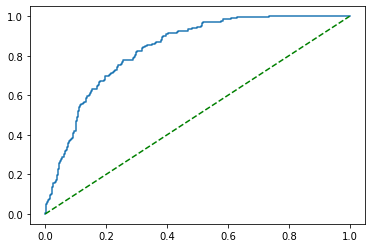

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = roc_curve(y_test,pred_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color = 'green', linestyle='--')
# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

In [25]:
from stableDT import stableDecisionTree
from stableDT import visualize_tree

min_sample_ratio = 0.15
#max_depth = 4
impurity_measure = 'entropy'
iter_num = 100

o_sdt = stableDecisionTree(
min_sample = min_sample_ratio * len(x_data),
iter_num = iter_num,
impurity_measure = impurity_measure)

o_sdt.fit(x_train, y_train)

In [26]:
x_test = pd.DataFrame(x_test, columns = x_data.columns)
x_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
5732,0.71429,0.00000,0.00000,-0.24350,-0.01042,0.00000,0.00000,1.00000,0.00000
3176,-0.48571,0.00000,0.00000,0.62151,0.00000,1.00000,0.00000,0.00000,0.00000
237,0.28571,0.00000,0.00000,3.15805,-0.14583,0.00000,0.00000,1.00000,0.00000
8679,1.00000,0.00000,1.00000,3.36037,0.01042,0.00000,0.00000,1.00000,0.00000
5526,0.82857,1.00000,0.00000,2.83604,0.48958,1.00000,0.00000,1.00000,0.00000
...,...,...,...,...,...,...,...,...,...
2260,-0.45714,0.00000,0.00000,0.14769,-0.51042,0.00000,0.00000,0.00000,0.00000
4855,0.08571,0.00000,0.00000,-0.20973,-0.35417,0.00000,0.00000,1.00000,0.00000
2304,0.08571,0.00000,0.00000,0.35742,-0.77083,0.00000,0.00000,0.00000,1.00000
7215,0.97143,0.00000,0.00000,3.95168,0.43750,0.00000,0.00000,1.00000,0.00000


In [27]:
sdt_pred_y = o_sdt.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, accuracy_score, precision_score

f1_s = f1_score(y_test, sdt_pred_y)
pre_s = precision_score(y_test, sdt_pred_y)
rec_s = recall_score(y_test, sdt_pred_y)
acc_s = accuracy_score(y_test, sdt_pred_y) 
print("F1 Score : ", str(round(f1_s, 3))); print("Precision : ", str(round(pre_s, 3))); print("Recall : ", str(round(rec_s, 3))); print("Accuracy : ", str(round(acc_s, 3)))

F1 Score :  0.748
Precision :  0.759
Recall :  0.738
Accuracy :  0.751


AUC: 0.7510974358974359


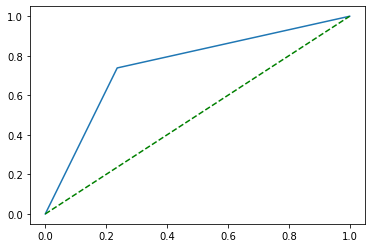

In [29]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = roc_curve(y_test, sdt_pred_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color = 'green', linestyle='--')
# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

In [30]:
# confusion matrix
cm = confusion_matrix(y_test, sdt_pred_y)
cfmat_pd = pd.DataFrame(cm, index = ['Negative(true)', 'Positive(true)'], columns = ['Negative(pred)', 'Postive(pred)'])
cfmat_pd

,Negative(pred),Postive(pred)
Negative(true),1432,443
Positive(true),493,1392


In [31]:
# exporting rules to text
o_sdt.export_text()

IF age > 0.0 AND age > 0.6571 AND avg_glucose_level <= 0.9529 AND age <= 1.0 AND bmi <= 0.9062 THEN y = 1
IF age > 0.0 AND age > 0.6571 AND avg_glucose_level > 0.9529 AND bmi <= 2.0208 AND bmi <= 1.7292 AND bmi <= 1.4896 AND avg_glucose_level > 1.0907 AND bmi > -0.625 AND avg_glucose_level > 1.1379 AND avg_glucose_level > 4.0939 THEN y = 1
IF age > 0.0 AND age > 0.6571 AND avg_glucose_level > 0.9529 AND bmi <= 2.0208 AND bmi <= 1.7292 AND bmi <= 1.4896 AND avg_glucose_level > 1.0907 AND bmi > -0.625 AND avg_glucose_level > 1.1379 AND avg_glucose_level <= 4.0939 THEN y = 1
IF age > 0.0 AND age > 0.6571 AND avg_glucose_level > 0.9529 AND bmi <= 2.0208 AND bmi <= 1.7292 AND bmi <= 1.4896 AND avg_glucose_level <= 1.0907 THEN y = 1
IF age > 0.0 AND age > 0.6571 AND avg_glucose_level <= 0.9529 AND age > 1.0 THEN y = 1
IF age > 0.0 AND age <= 0.6571 AND bmi > -0.0938 AND avg_glucose_level <= 0.2548 AND age <= 0.4857 THEN y = 1
IF age > 0.0 AND age > 0.6571 AND avg_glucose_level > 0.9529 AND b

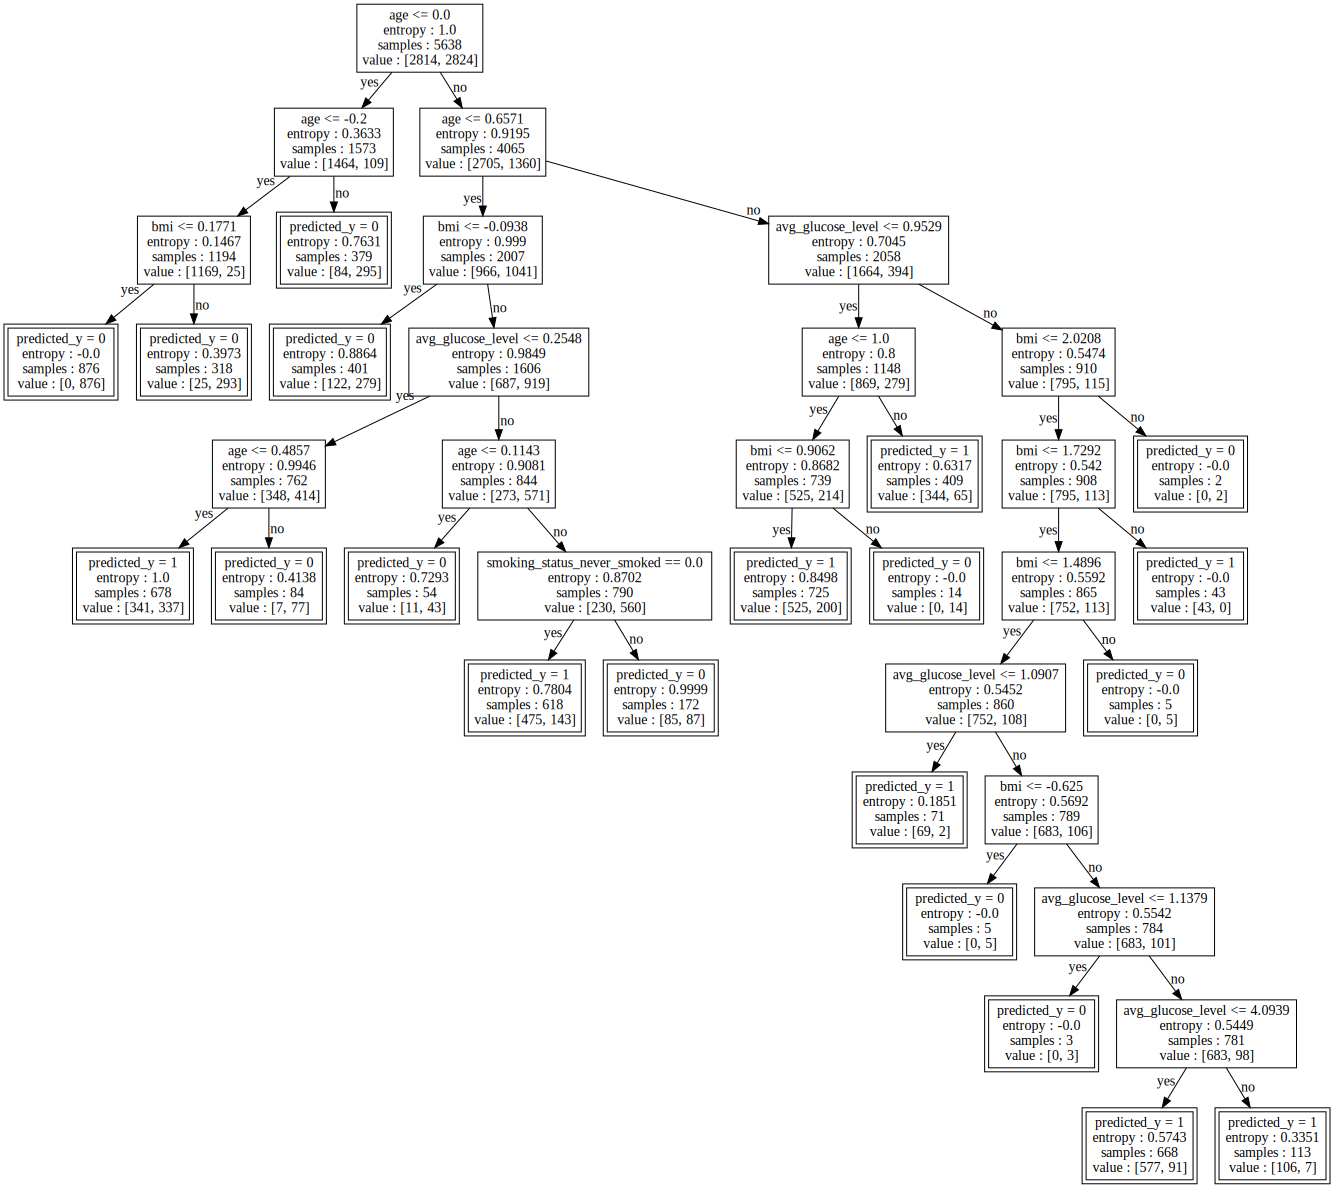

In [32]:
visualize_tree(o_sdt.root)

In [33]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

o_rfc = RandomForestClassifier(n_estimators=100,  random_state=1)
o_rfc.fit(x_train, y_train)
o_y_rfc_pred = o_rfc.predict_proba(x_test)

In [34]:
def cut_off(y, threshold) :
    Y = y.copy()  # 대문자 Y를 새로운 변수로 하여 기존의 y값에 영향이 가지 않도록 한다.
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(o_y_rfc_pred, 0.5)

In [35]:
f1_s = f1_score(y_test, pred_Y[:, 1])
pre_s = precision_score(y_test, pred_Y[:, 1])
rec_s = recall_score(y_test, pred_Y[:, 1])
acc_s = accuracy_score(y_test, pred_Y[:, 1]) 
print("F1 Score : ", f1_s); print("Precision : ", pre_s); print("Recall : ", rec_s); print("Accuracy : ", acc_s)

F1 Score :  0.9882044560943645
Precision :  0.9766839378238342
Recall :  1.0
Accuracy :  0.988031914893617


AUC: 1.0


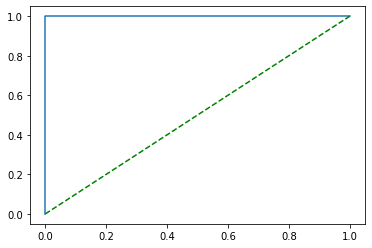

In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = roc_curve(y_test, o_y_rfc_pred[:, 1],pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color = 'green', linestyle='--')
# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

In [1785]:
mat = confusion_matrix(y_test, pred_Y[:, 1])
mat_pd = pd.DataFrame(mat, index = ['Negative(true)', 'Positive(true)'], columns = ['Negative(pred)', 'Postive(pred)'])

mat_pd

,Negative(pred),Postive(pred)
Negative(true),1825,50
Positive(true),0,1885


In [1846]:
perm3 = PermutationImportance(o_rfc,  n_iter=30).fit(x_test, y_test)
eli5.show_weights(perm3, top = 20, feature_names = x_test.columns.tolist())

Weight,Feature
0.3698 ± 0.0137,age
0.2961 ± 0.0091,avg_glucose_level
0.2370 ± 0.0123,bmi
0.1132 ± 0.0062,hypertension
0.0912 ± 0.0076,smoking_status_never_smoked
0.0859 ± 0.0084,gender_Male
0.0652 ± 0.0048,heart_disease
0.0384 ± 0.0036,smoking_status_formerly_smoked
0.0265 ± 0.0031,smoking_status_smokes


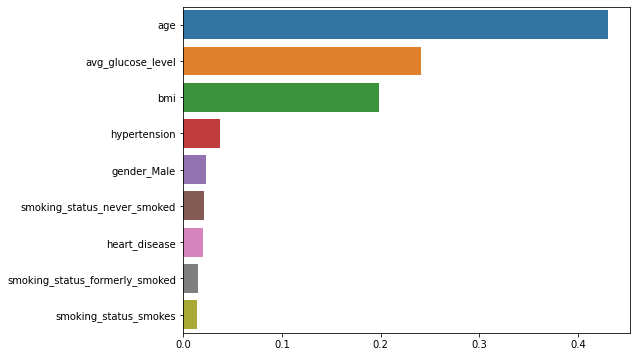

In [1852]:
ftr_importances_value = o_rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_value, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [1144]:
result_rfc = permutation_importance(o_rfc, x_test,y_test , n_repeats=10, random_state=333, n_jobs=2)
sorted_idx_rfc = result_rfc.importances_mean.argsort()
importances_rf = pd.DataFrame(result_rfc.importances_mean[sorted_idx_rfc], index=x_test.columns[sorted_idx_rfc]).sort_values(0, ascending=False).iloc[:45]

In [1145]:
importances_rf

,0
age,0.24558
avg_glucose_level,0.01745
bmi,0.01534
hypertension,0.00868
smoking_status_never_smoked,0.00830
smoking_status_smokes,0.00520
heart_disease,0.00473
gender_Male,0.00397
smoking_status_formerly_smoked,0.00201


In [1787]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gtb = GradientBoostingClassifier()

gtb.fit(x_train, y_train)
o_y_gtb_pred = gtb.predict(x_test)

In [1788]:
f1_s = f1_score(y_test, o_y_gtb_pred)
pre_s = precision_score(y_test, o_y_gtb_pred)
rec_s = recall_score(y_test, o_y_gtb_pred)
acc_s = accuracy_score(y_test, o_y_gtb_pred) 
print("F1 Score : ", f1_s); print("Precision : ", pre_s); print("Recall : ", rec_s); print("Accuracy : ", acc_s)

F1 Score :  0.8542084168336674
Precision :  0.8092074038917892
Recall :  0.9045092838196287
Accuracy :  0.8452127659574468


In [1981]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

params = {'max_depth' : range(2, 20, 1),
          'min_samples_split' : range(2, 100, 10),
          'criterion' : ['gini', 'entropy']}

grid_cv = GridSearchCV(tree.DecisionTreeClassifier(), params, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 파라미터 : ', grid_cv.best_params_)
print('최고 예측 정확도 : {:.4f}'.format(grid_cv.best_score_))

최적 파라미터 :  {'criterion': 'entropy', 'max_depth': 19, 'min_samples_split': 2}
최고 예측 정확도 : 0.9636


In [2020]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_split=2)               # 종속변수가 현재 범주형
clf = clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
clf_pred_proba = clf.predict_proba(x_test)
f1_s = f1_score(y_test, clf_pred)
pre_s = precision_score(y_test, clf_pred)
rec_s = recall_score(y_test, clf_pred)
acc_s = accuracy_score(y_test, clf_pred) 
print("F1 Score : ", f1_s); print("Precision : ", pre_s); print("Recall : ", rec_s); print("Accuracy : ", acc_s)

F1 Score :  0.9595316874522779
Precision :  0.9222113502935421
Recall :  1.0
Accuracy :  0.9577127659574468


In [2021]:
mat = confusion_matrix(y_test, clf_pred)
mat_pd = pd.DataFrame(mat, index = ['Negative(true)', 'Positive(true)'], columns = ['Negative(pred)', 'Postive(pred)'])

mat_pd

,Negative(pred),Postive(pred)
Negative(true),1716,159
Positive(true),0,1885


AUC: 0.9656190981432361


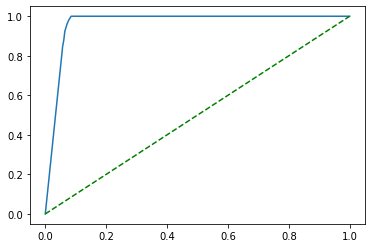

In [2022]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = roc_curve(y_test, clf_pred_proba[:, 1],pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color = 'green', linestyle='--')
# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)

In [2023]:
import graphviz
from sklearn.tree import export_graphviz

In [2058]:
export_graphviz(clf, out_file = 'tree.dot', feature_names=x_data.columns, class_names='stroke', max_depth = 4, precision = 3, filled = True, rounded = True)

In [2057]:
clf_feature = pd.Series(clf.feature_importances_)
clf_feature = clf_feature.to_frame('value')
clf_feature = pd.DataFrame(clf_feature, index=x_data.columns)


feat = pd.DataFrame(clf.feature_importances_, index = x_data.columns, columns=['feature_importance'])
feat.sort_values(by = ['feature_importance'], ascending = False)

,feature_importance
age,0.42134
bmi,0.25574
avg_glucose_level,0.22590
smoking_status_never_smoked,0.03008
gender_Male,0.02325
hypertension,0.01984
heart_disease,0.00935
smoking_status_formerly_smoked,0.00862
smoking_status_smokes,0.00588


In [2052]:
clf_feature

,value
age,NaN
hypertension,NaN
heart_disease,NaN
avg_glucose_level,NaN
bmi,NaN
gender_Male,NaN
smoking_status_formerly_smoked,NaN
smoking_status_never_smoked,NaN
smoking_status_smokes,NaN


In [2059]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

0

In [2060]:
from IPython.display import Image
Image(filename = 'decistion-tree.png')

In [1993]:
x_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,67.00000,0,1,228.69000,36.60000,1,1,0,0
2,80.00000,0,1,105.92000,32.50000,1,0,1,0
3,49.00000,0,0,171.23000,34.40000,0,0,0,1
4,79.00000,1,0,174.12000,24.00000,0,0,1,0
5,81.00000,0,0,186.21000,29.00000,1,1,0,0
...,...,...,...,...,...,...,...,...,...
5104,13.00000,0,0,103.08000,18.60000,0,0,0,0
5106,81.00000,0,0,125.20000,40.00000,0,0,1,0
5107,35.00000,0,0,82.99000,30.60000,0,0,1,0
5108,51.00000,0,0,166.29000,25.60000,1,1,0,0
